In [2]:
import pandas as pd
import numpy as np

#Overview:
   This project is about to predict and give the user price of laptops on the basis of given input features;  
  
*  Data Cleaning
*  EDA
*   Feature Enginnering
*    Model building
              Using these Algorithms:

              
              LinearRegression, Ridge, Lasso
              SVR
              GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
              DecisionTreeRegressor
              KNeighborsRegressor
              XGBRegressor




*   convert Into streamlit based website
*   Deploye



In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# **Change this line to point to the correct file within the dataset:**
file_path = "laptop_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ganeshmohane/laptop-datacsv",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# Data Cleaning

In [6]:
df.shape

(1303, 12)

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB




*   Removing unnamed col
*   removing GB from ram col
*   removing KG from weight colm






In [10]:
# removing column
df.drop(columns=['Unnamed: 0'], inplace= True)
#df=df.drop(columns=['Unnamed: 0'], axis=1)  both are same

In [11]:
# Removing GB and KG from columns

df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

# changing datatype
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [15]:
# df['Price'] into Int

df['Price']= df['Price'].astype(int)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\633490910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']= df['Price'].astype(int)


In [16]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   int32  
dtypes: float32(1), float64(1), int32(2), object(7)
memory usage: 104.5+ KB


# EDA

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


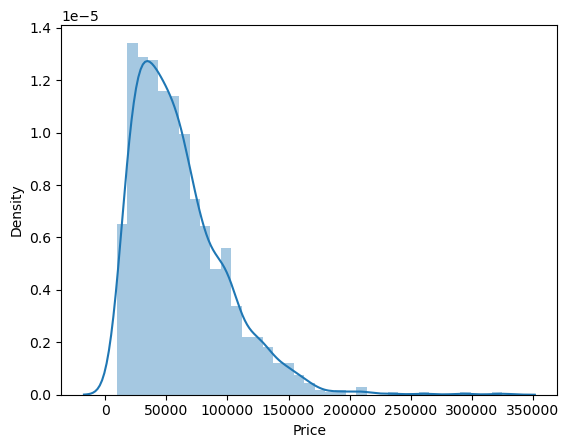

In [19]:
sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='Company'>

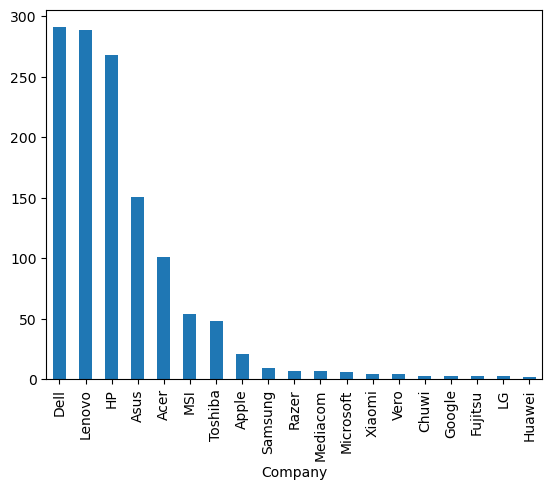

In [20]:
# No. of companies Vs no of Laptops
df['Company'].value_counts().plot(kind='bar')

In [21]:
# i want to check average price of each company laptop
avg_price=df.groupby('Company')['Price'].mean().sort_values(ascending=False)
avg_price

Company
Razer        178281.857143
LG           111834.000000
MSI           92115.722222
Google        89385.666667
Microsoft     85903.166667
Apple         83340.047619
Huawei        75870.000000
Samsung       75307.666667
Toshiba       67548.604167
Dell          63894.213058
Xiaomi        60390.250000
Asus          60143.509934
Lenovo        58280.463668
HP            57558.664179
Fujitsu       38840.333333
Acer          33750.485149
Chuwi         16745.333333
Mediacom      15717.000000
Vero          11583.750000
Name: Price, dtype: float64

<Axes: xlabel='Company'>

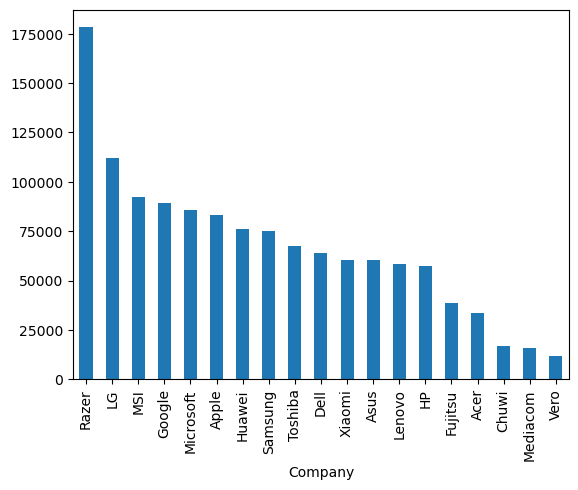

In [22]:
avg_price.plot(kind='bar')

<Axes: xlabel='TypeName'>

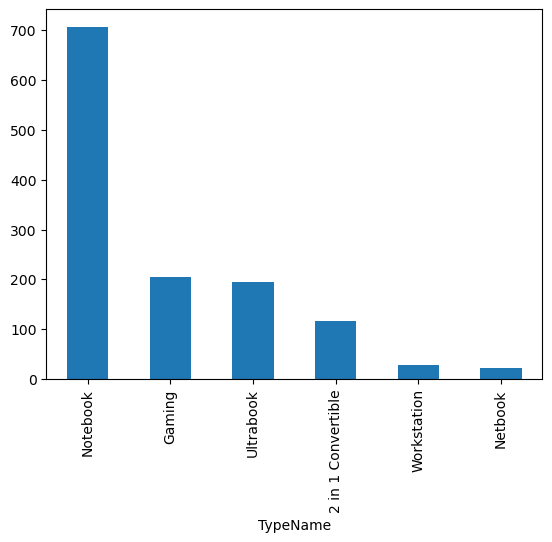

In [23]:
# types of laptops
df['TypeName'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

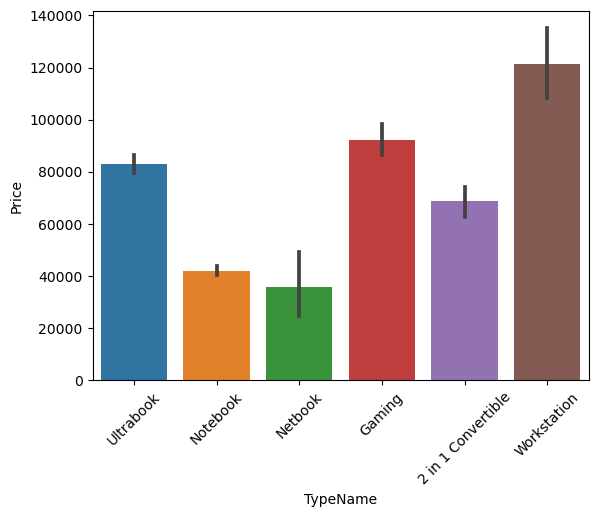

In [24]:
# types of laptop with avg price

sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=45)

<Axes: xlabel='Inches', ylabel='Price'>

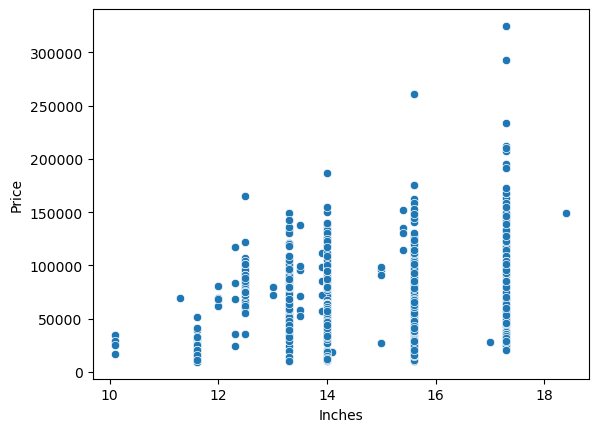

In [25]:
# relation between size of laptop(inches) & Price

sns.scatterplot(x=df['Inches'] , y=df['Price'] )
# positive relationship

In [26]:
# screen resoltion vs Price
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

### Feature engg

In [27]:
# with the help of feature engg, i need to extract some information from ScreenResolution column


In [28]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0 )

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\3168240284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0 )


In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
624,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.88,49656,0
264,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R5 M430,Windows 10,2.24,30103,0
388,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.00,113752,0
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712,1
243,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,46833,0


<Axes: xlabel='Touchscreen'>

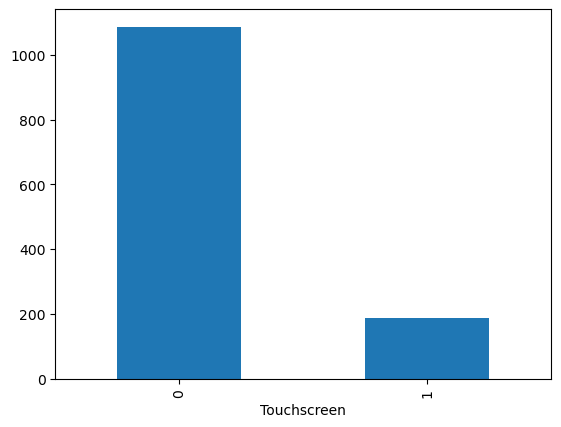

In [30]:
df['Touchscreen'].value_counts().plot(kind='bar')
# non touchscreen laptops are more in No.

<Axes: xlabel='Touchscreen', ylabel='Price'>

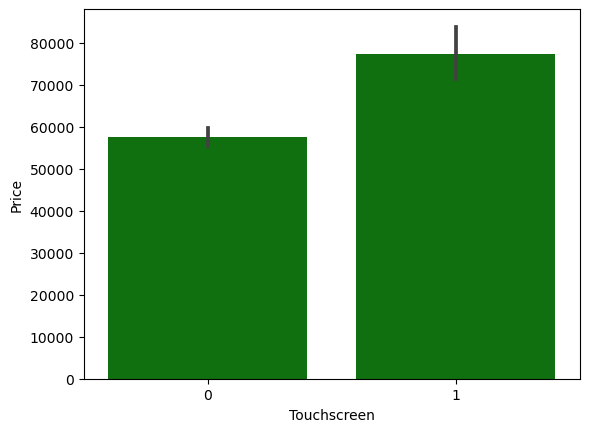

In [31]:
# touchscreen price

sns.barplot(x=df['Touchscreen'], y=df['Price'] , color='green')
# touchscreen laptops are expensive

In [32]:
# now checking for IPS panel

df['IPSpanel']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\4010946868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IPSpanel']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)


In [33]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel
147,Asus,Notebook,15.6,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18328,0,0
735,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.85,41505,0,0
717,Lenovo,Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4,500GB HDD,AMD Radeon R4,Windows 10,2.19,15877,0,0
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660,0,0
292,HP,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.54,26053,0,0


<Axes: xlabel='IPSpanel', ylabel='Price'>

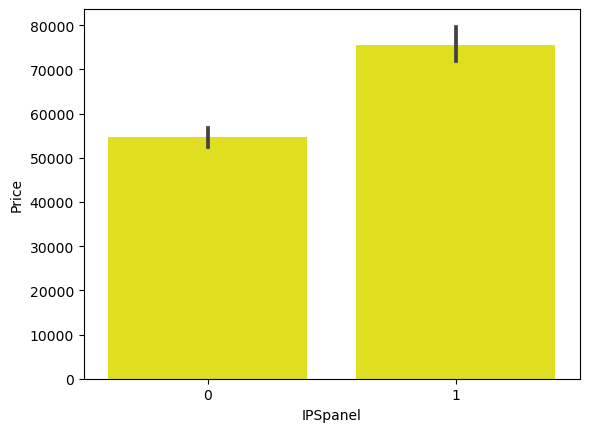

In [34]:
# Ips panel vs price

sns.barplot(x=df['IPSpanel'], y=df['Price'] , color='yellow')

# IPs panel laptops are expensive

In [35]:
# creating new column for resultion

df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1017516171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d{3,4}x\d{3,4})')


In [36]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,Resolution
760,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,55837,0,1,1920x1080
48,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.30,34045,0,0,1920x1080
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560,0,0,1920x1080
863,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,No OS,2.50,54185,0,1,1920x1080
669,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.10,21951,0,0,1366x768


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   int32  
 11  Touchscreen       1274 non-null   int64  
 12  IPSpanel          1274 non-null   int64  
 13  Resolution        1274 non-null   object 
dtypes: float32(1), float64(1), int32(2), int64(2), object(8)
memory usage: 134.4+ KB


In [38]:
corr=df.corr(numeric_only=True)

<Axes: >

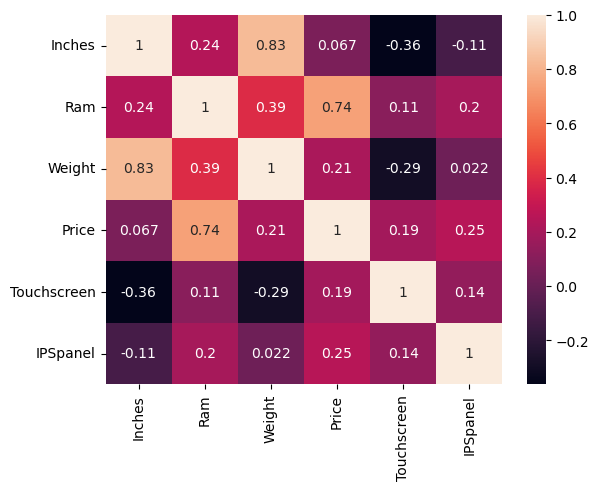

In [39]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

In [40]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560x1600


In [41]:
#Creating PPI(pixel per inches) column from resolution and Inches Column

# Creating X column
df['Xresol']=df['Resolution'].str.split('x').str[0].astype('int32')

#creating Y column
df['Yresol']=df['Resolution'].str.split('x').str[1].astype('int32')

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1121131261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Xresol']=df['Resolution'].str.split('x').str[0].astype('int32')
C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1121131261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yresol']=df['Resolution'].str.split('x').str[1].astype('int32')


In [42]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,Resolution,Xresol,Yresol
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,2560x1600,2560,1600


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   int32  
 11  Touchscreen       1274 non-null   int64  
 12  IPSpanel          1274 non-null   int64  
 13  Resolution        1274 non-null   object 
 14  Xresol            1274 non-null   int32  
 15  Yresol            1274 non-null   int32  
dtypes: float32(1), float64(1), int32(4), int64(2), 

In [44]:
# Creating PPI Column
df['PPI']= (((df['Xresol']**2) + (df['Yresol']**2) )**0.5 /df['Inches']).astype('float32')

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1527790240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PPI']= (((df['Xresol']**2) + (df['Yresol']**2) )**0.5 /df['Inches']).astype('float32')


In [45]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,Resolution,Xresol,Yresol,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,2560x1600,2560,1600,226.983002
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,1440x900,1440,900,127.677940


In [46]:
# drop ScreenResolution ,Inch , Resolution, X,YResol Columns
df.drop(columns=['ScreenResolution'], inplace=True)
df.drop(columns=['Inches','Resolution','Xresol','Yresol'], inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\3178731013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ScreenResolution'], inplace=True)
C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\3178731013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Inches','Resolution','Xresol','Yresol'], inplace=True)


In [47]:
# now extracting meaningful columns from Cpu column
#Creating 5 New Columns from Cpu Column
#1 Intel Core i3
#2 Intel Core i5
#3 Intel Core i7
#4 Intel celeron,Intel plantium processor catagory
#5 AMD


df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [48]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [49]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\442052894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))


In [50]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1269         Intel Core i7
1270         Intel Core i7
1271         Intel Core i7
1272    Intel Celeron Dual
1273         Intel Core i7
Name: Cpu Name, Length: 1274, dtype: object

In [51]:
def categorize_cpu(cpu_name):
    if 'Intel Core i5' in cpu_name:
        return 'Intel Core i5'
    elif 'Intel Core i3' in cpu_name:
        return 'Intel Core i3'
    elif 'Intel Core i7' in cpu_name:
        return 'Intel Core i7'
    elif 'Intel' in cpu_name:
        return 'Other Intel Processors'
    elif 'AMD' in cpu_name:
        return 'AMD Processors'
    else:
        return 'Other'


In [52]:
categorize_cpu("Intel Core i7")

'Intel Core i7'

In [53]:
df['Cpu brand'] = df['Cpu Name'].apply(categorize_cpu)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\2966882647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu brand'] = df['Cpu Name'].apply(categorize_cpu)


In [54]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu Name,Cpu brand
259,Lenovo,2 in 1 Convertible,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522,1,1,141.212006,Intel Core i7,Intel Core i7
172,Lenovo,Notebook,AMD A6-Series 9220 2.9GHz,4,500GB HDD,AMD Radeon R4 Graphics,No OS,2.20,16463,0,0,100.454666,AMD A6-Series 9220,AMD Processors
642,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536,0,1,157.350510,Intel Core i7,Intel Core i7
495,Lenovo,Ultrabook,Intel Core i5 6200U 2.3GHz,8,180GB SSD,Intel HD Graphics 520,Windows 10,1.30,58554,0,1,125.367432,Intel Core i5,Intel Core i5
17,Apple,Ultrabook,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274,0,1,220.534622,Intel Core i7,Intel Core i7


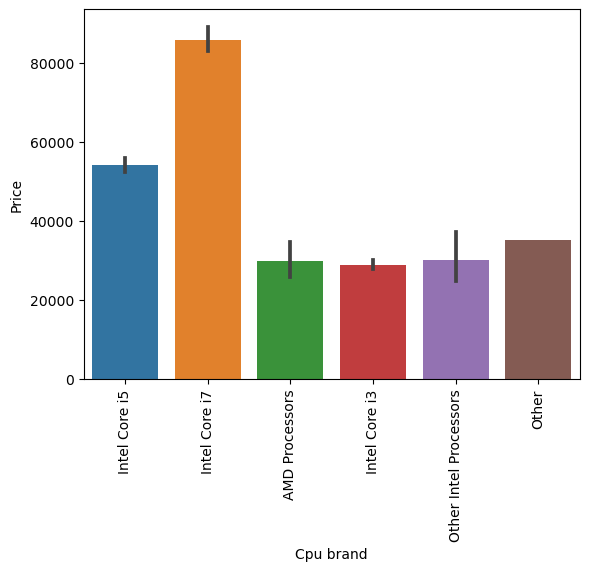

In [55]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [56]:
# drop unnecessary columns
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1237448664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu','Cpu Name'], inplace=True)


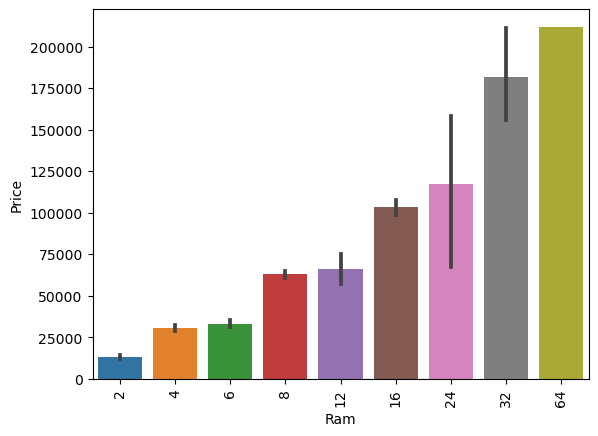

In [57]:
# lets have a look in Ram column

sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Ram'>

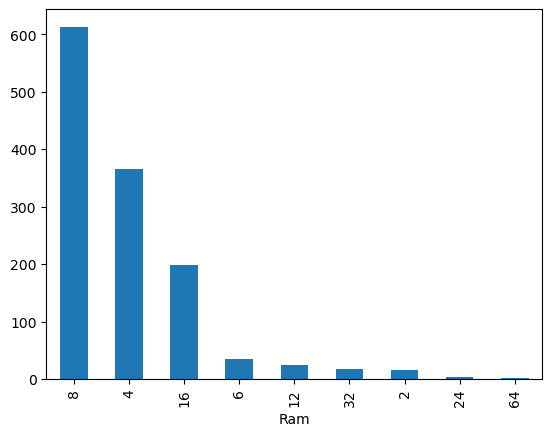

In [58]:
df['Ram'].value_counts().plot(kind='bar')
# shows number os rams for each category

In [59]:
# Memory column
# creating 4 new column from this MEmorty column
#1 HDD
#2 SDD
#3 Flash storage
#4 Hybrid
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [60]:
# #1 HDD
# #2 SDD
# #3 Flash storage
# #4 Hybrid

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: x.split()[0] if "HDD" in x else 0)
df["Layer1HDD"] = df["Layer1HDD"].astype(int)
df["Layer1SSD"] = df["first"].apply(lambda x: x.split()[0] if "SSD" in x else 0)
df["Layer1SSD"] = df["Layer1SSD"].astype(int)
df["Layer1Hybrid"] = df["first"].apply(lambda x: x.split()[0] if "Hybrid" in x else 0)
df["Layer1Hybrid"] = df["Layer1Hybrid"].astype(int)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: x.split()[0] if "Flash Storage" in x else 0)
df["Layer1Flash_Storage"] = df["Layer1Flash_Storage"].astype(int)

df['second'].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: x.split()[0] if "HDD" in x else 0)
df["Layer2HDD"] = df["Layer2HDD"].astype(int)
df["Layer2SSD"] = df["second"].apply(lambda x: x.split()[0] if "SSD" in x else 0)
df["Layer2SSD"] = df["Layer2SSD"].astype(int)
df["Layer2Hybrid"] = df["second"].apply(lambda x: x.split()[0] if "Hybrid" in x else 0)
df["Layer2Hybrid"] = df["Layer2Hybrid"].astype(int)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: x.split()[0] if "Flash Storage" in x else 0)
df["Layer2Flash_Storage"] = df["Layer2Flash_Storage"].astype(int)

df["HDD"]=(df["Layer1HDD"]+df["Layer2HDD"])
df["SSD"]=(df["Layer1SSD"]+df["Layer2SSD"])
df["Hybrid"]=(df["Layer1Hybrid"]+df["Layer2Hybrid"])
df["Flash_Storage"]=(df["Layer1Flash_Storage"]+df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\4275859686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\4275859686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Memory"] = df["Memory"].str.replace('GB', '')
C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\4275859686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [61]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
207,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.21,103842,1,1,331.264221,Intel Core i7,0,256,0,0
303,Lenovo,Notebook,8,2000 HDD,Nvidia GeForce 940MX,No OS,2.20,29250,0,0,100.454666,Intel Core i5,2000,0,0,0
909,LG,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,0.98,101178,1,1,157.350510,Intel Core i7,0,512,0,0
659,Dell,Gaming,32,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691,0,1,254.671356,Intel Core i7,1000,512,0,0
35,Lenovo,Notebook,4,64 Flash Storage,Intel HD Graphics 500,Windows 10,1.44,13266,0,0,111.935204,Other Intel Processors,0,0,0,64


In [62]:
# drop Memory column
df.drop(columns=['Memory'], inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1690194173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory'], inplace=True)


In [63]:
# correlation with price

df.corr(numeric_only=True)['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188630
IPSpanel         0.250357
PPI              0.469538
HDD             -0.098012
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037175
Name: Price, dtype: float64

In [64]:
# here we colclude that i dont need  Hybrid and Flash_storage cols
# drop unnecessary columns
df.drop(columns=['Flash_Storage','Hybrid'], inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\51412827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Flash_Storage','Hybrid'], inplace=True)


In [65]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256


In [66]:
# working with Gpu col, need to extract brand name

df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0] )
df['Gpu brand']

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\3339469389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0] )


0        Intel
1        Intel
2        Intel
3          AMD
4        Intel
         ...  
1269    Nvidia
1270     Intel
1271     Intel
1272     Intel
1273       AMD
Name: Gpu brand, Length: 1274, dtype: object

In [67]:
df.drop(columns=['Gpu'], inplace=True)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\3949037655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'], inplace=True)


In [68]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,226.983002,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.212006,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534622,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,226.983002,Intel Core i5,0,256,Intel


In [69]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [70]:
# Removing ARM brand
df=df[df['Gpu brand']!="ARM"]

<Axes: xlabel='Gpu brand'>

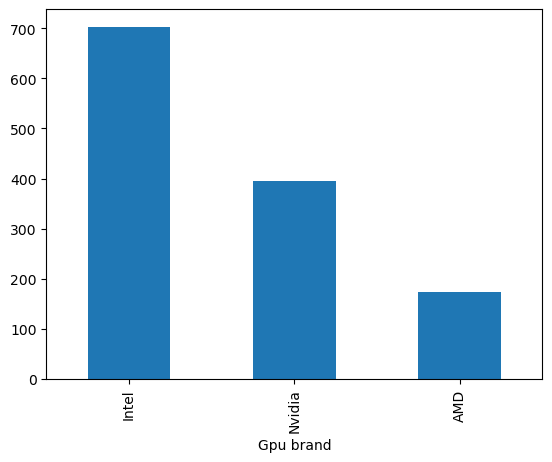

In [71]:
df['Gpu brand'].value_counts().plot(kind="bar")

<Axes: xlabel='Gpu brand', ylabel='Price'>

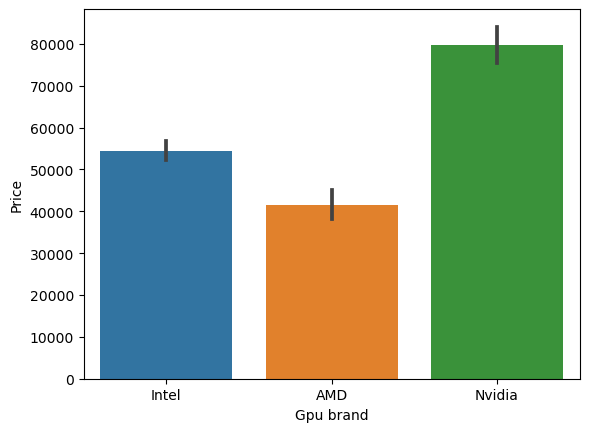

In [72]:
sns.barplot(x=df['Gpu brand'], y=df['Price'])

<Axes: xlabel='OpSys'>

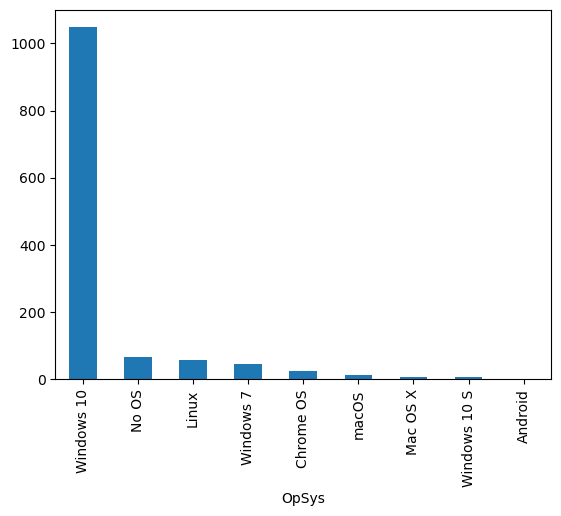

In [73]:
# dealing with Opsystem column

df['OpSys'].value_counts().plot(kind="bar")

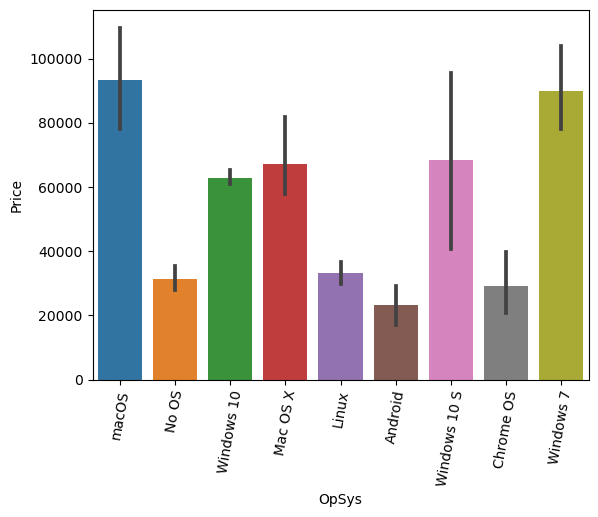

In [74]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=80)
plt.show()

In [75]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [76]:
def opsys_categ(input):
  if input == "Windows 10" or input=="Windows 7" or input=="Windows 10 S":
    return "Windows_OS"
  elif input=="macOS" or input=="Mac OS X":
    return "Mac_OS"
  else:
    return "other/Android/Linux/Chrome"

In [77]:
opsys_categ("Windows 10 S")

'Windows_OS'

In [78]:
df['Os']=df['OpSys'].apply(opsys_categ)

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\4126062590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Os']=df['OpSys'].apply(opsys_categ)


In [79]:
df.drop(columns=['OpSys'] , inplace=True )

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\1441298461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'] , inplace=True )


In [80]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
877,Xiaomi,Ultrabook,8,1.28,49816,0,1,165.632111,Intel Core i5,0,256,Nvidia,Windows_OS
196,Razer,Gaming,32,3.49,324954,1,0,254.671356,Intel Core i7,0,1000,Nvidia,Windows_OS
370,Asus,2 in 1 Convertible,12,2.26,58554,1,0,141.212006,Intel Core i7,2000,512,Nvidia,Windows_OS
262,HP,Notebook,4,2.10,38468,0,1,141.212006,Intel Core i5,500,0,Intel,Windows_OS
1116,Lenovo,Gaming,16,4.60,146519,0,1,127.335678,Intel Core i7,0,256,Nvidia,Windows_OS


<Axes: xlabel='Weight', ylabel='Price'>

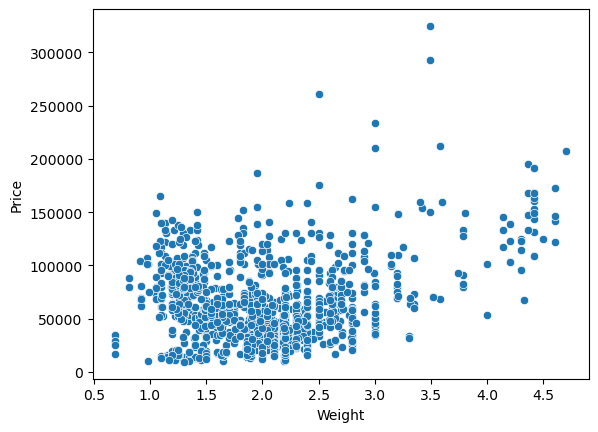

In [81]:
# weight column

sns.scatterplot(y=df['Price'], x=df['Weight'])

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\2192964063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'], kde=True)


<Axes: xlabel='Weight', ylabel='Density'>

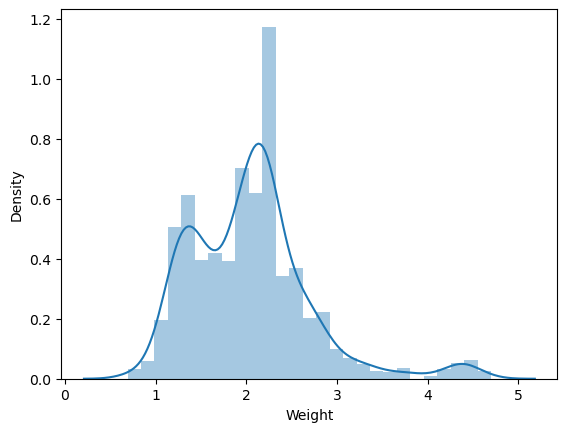

In [82]:
sns.distplot(df['Weight'], kde=True)

In [83]:
df.corr(numeric_only=True)['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
IPSpanel       0.251514
PPI            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

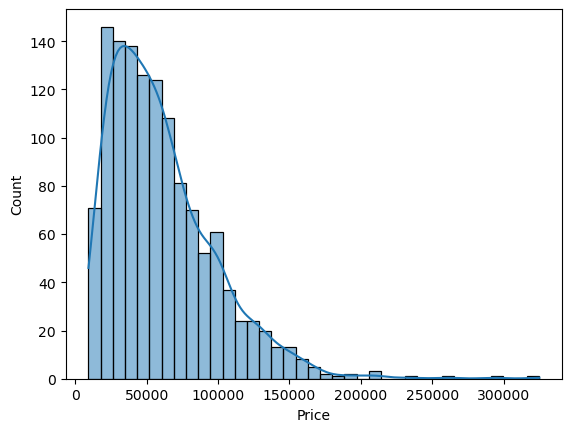

In [84]:
# target variable

sns.histplot(df['Price'], kde=True) # it is right skewed

In [85]:
df['Price']=np.log(df['Price'])

C:\Users\wasid\AppData\Local\Temp\ipykernel_3856\2429332350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=np.log(df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

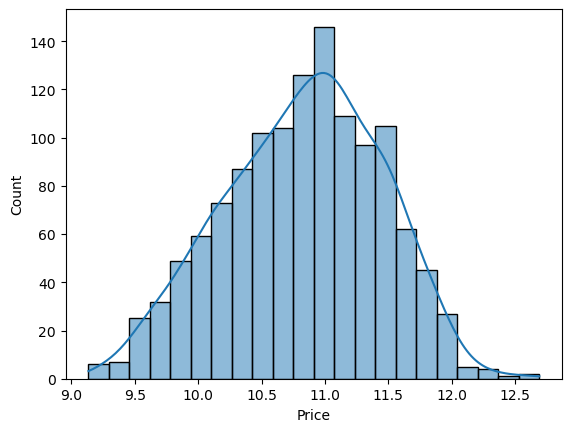

In [86]:
# After log transformation
sns.histplot(df['Price'], kde=True)

In [87]:
df.describe()

,Ram,Weight,Price,Touchscreen,IPSpanel,PPI,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828206,0.146897,0.279654,146.950836,413.715632,186.252946
std,5.098771,0.669241,0.619573,0.354142,0.449006,42.926723,518.054486,186.531571
min,2.000000,0.690000,9.134539,0.000000,0.000000,90.583405,0.000000,0.000000
25%,4.000000,1.500000,10.387363,0.000000,0.000000,127.335678,0.000000,0.000000
50%,8.000000,2.040000,10.872238,0.000000,0.000000,141.212006,0.000000,256.000000
75%,8.000000,2.310000,11.287442,0.000000,1.000000,157.350510,1000.000000,256.000000
max,64.000000,4.700000,12.691439,1.000000,1.000000,352.465149,2000.000000,1024.000000


In [88]:
X=df.drop(columns=['Price'])
y=df['Price']

In [89]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,128,Intel,Mac_OS
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac_OS
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,0,256,Intel,other/Android/Linux/Chrome
3,Apple,Ultrabook,16,1.83,0,1,220.534622,Intel Core i7,0,512,AMD,Mac_OS
4,Apple,Ultrabook,8,1.37,0,1,226.983002,Intel Core i5,0,256,Intel,Mac_OS
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454666,Intel Core i7,500,0,Nvidia,Windows_OS
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350510,Intel Core i7,0,128,Intel,Windows_OS
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053528,Intel Core i7,0,512,Intel,Windows_OS
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processors,0,0,Intel,Windows_OS


In [90]:
y

0       11.175745
1       10.776766
2       10.329931
3       11.814473
4       11.473093
          ...    
1269    10.555240
1270    10.433880
1271    11.288106
1272     9.409273
1273    10.614106
Name: Price, Length: 1273, dtype: float64

# Model Building

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [92]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.1 , random_state=4)

In [93]:
# handling with categorical columns

from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


# LinearRegression

In [94]:
# step 1

col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

In [95]:
col_tran

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_transorming',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [0, 1, 7, 10, 11])])

In [96]:
# step2
lr=LinearRegression()


In [97]:
#step3
model=Pipeline([
    ('transformer',col_tran),
    ('LinearReg',lr)
]
)

In [98]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_transorming',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1, 7, 10, 11])])),
                ('LinearReg', LinearRegression())])

In [99]:

y_pred = model.predict(X_test)
y_pred

array([11.17284232, 11.33193378, 10.13615511,  9.82280289, 11.10504003,
       10.52448838, 10.87317676, 10.40464315, 10.36820982, 10.95147782,
       11.31000473, 10.13245237, 10.70944005, 10.93073339, 11.15269615,
       11.08388717, 11.18413316, 11.94951936, 10.72498819, 10.81100446,
       10.59023887, 10.38216185, 11.07776425, 11.35990585, 11.02228621,
       10.72866046, 10.73189627, 11.45731125, 10.33620094, 11.10485274,
        9.77931604, 11.93021369, 10.42448164, 10.74833254, 11.24786898,
       11.12699853, 12.65094157, 10.54874582, 10.69275396, 10.07550007,
       11.40481418, 10.25436369, 11.18191438, 10.12562676, 10.9785695 ,
       11.31436882, 11.22705705, 10.77015416, 10.91160302, 11.0012639 ,
        9.61903395, 10.79980777, 10.09686829, 10.91071448, 11.48186494,
       12.09957269, 10.04037881, 11.74991475, 10.99711414, 10.81376431,
       10.4365697 , 10.56593153, 10.29838768, 10.65827348, 10.66777328,
       11.72157416, 11.00349205, 10.23849551, 10.66097079, 11.10

In [100]:
# Linear Regression r2_Score
lr_score=r2_score(y_test,y_pred)

print(f"LinearReg_MOdel_score:{lr_score:.2f}")

LinearReg_MOdel_score:0.80


In [101]:
prediction_df=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
prediction_df

,y_test,y_pred
1032,11.058779,11.172842
918,11.182670,11.331934
559,10.401866,10.136155
584,9.662498,9.822803
786,10.968560,11.105040
...,...,...
581,10.891783,10.611053
1160,11.288106,11.162087
1033,11.061453,10.943459
353,11.436206,11.713987


In [102]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,11.175745,0,1,226.983002,Intel Core i5,0,128,Intel,Mac_OS
1,Apple,Ultrabook,8,1.34,10.776766,0,0,127.677940,Intel Core i5,0,0,Intel,Mac_OS
2,HP,Notebook,8,1.86,10.329931,0,0,141.212006,Intel Core i5,0,256,Intel,other/Android/Linux/Chrome
3,Apple,Ultrabook,16,1.83,11.814473,0,1,220.534622,Intel Core i7,0,512,AMD,Mac_OS
4,Apple,Ultrabook,8,1.37,11.473093,0,1,226.983002,Intel Core i5,0,256,Intel,Mac_OS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,10.555240,0,0,100.454666,Intel Core i7,500,0,Nvidia,Windows_OS
1270,Lenovo,2 in 1 Convertible,4,1.80,10.433880,1,1,157.350510,Intel Core i7,0,128,Intel,Windows_OS
1271,Lenovo,2 in 1 Convertible,16,1.30,11.288106,1,1,276.053528,Intel Core i7,0,512,Intel,Windows_OS
1272,Lenovo,Notebook,2,1.50,9.409273,0,0,111.935204,Other Intel Processors,0,0,Intel,Windows_OS


In [103]:
# user prompt for prediction
querry=np.array(["Hp","Ultrabook",4, 1.37,	0,	1,	230.983002,	"Intel Core i5",	128,	128,	"Intel",	"Mac_OS"])

# need to convert into
querry_df=pd.DataFrame([querry], columns=X_train.columns)

# user's prediction
result=model.predict(querry_df)
result

c:\Users\wasid\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([11.01595706])

In [104]:
# converting back to normal price
np.exp(result)

array([60837.22065751])

# Ridge Regression

In [105]:
# step 1

col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
rr=Ridge(alpha=1)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('Ridge',rr)
])

model.fit(X_train,y_train)

yrr_pred = model.predict(X_test)

# Linear Regression r2_Score
rr_score=r2_score(y_test,yrr_pred)

print(f"Ridge_MOdel_score:{rr_score:.2f}")

Ridge_MOdel_score:0.80


# Lasso Regression

In [106]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
lso=Lasso(alpha=0.001)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('lasso',lso)
])

model.fit(X_train,y_train)

ylso_pred = model.predict(X_test)

# Linear Regression r2_Score
lso_score=r2_score(y_test,ylso_pred)

print(f"Lasso_MOdel_score:{lso_score:.2f}")

Lasso_MOdel_score:0.80


# KNN

In [107]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
knn=KNeighborsRegressor(weights="distance", n_neighbors=5)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('knn',knn)
])

model.fit(X_train,y_train)

yknn_pred = model.predict(X_test)

# Linear Regression r2_Score
knn_score=r2_score(y_test,yknn_pred)

print(f"KNN_MOdel_score:{knn_score:.2f}")

KNN_MOdel_score:0.84


# Decission Tree

In [108]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
dt=DecisionTreeRegressor(max_depth=5 ,random_state= 100)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('Dt',dt)
])

model.fit(X_train,y_train)

ydt_pred = model.predict(X_test)

# Linear Regression r2_Score
dt_score=r2_score(y_test,yknn_pred)

print(f"Decission Tree_MOdel_score:{dt_score:.2f}")

Decission Tree_MOdel_score:0.84


# Random Forest

In [109]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
rf = RandomForestRegressor(n_estimators=100, max_samples=.7, max_depth=12, max_features=.7 )

# step3
rf_model=Pipeline([
    ('transformer',col_tran),
    ('Random Forest',rf)
])

rf_model.fit(X_train,y_train)

yrf_pred = rf_model.predict(X_test)

# Linear Regression r2_Score
rf_score=r2_score(y_test,yrf_pred)

print(f"Random Forest_MOdel_score:{rf_score:.2f}")


Random Forest_MOdel_score:0.87


# GradientBoost

In [110]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
gb = GradientBoostingRegressor(n_estimators=100)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('GB',gb)
])

model.fit(X_train,y_train)

ygb_pred = model.predict(X_test)

# Linear Regression r2_Score
gb_score=r2_score(y_test,ygb_pred)

print(f"Gradient Boosting_MOdel_score:{gb_score:.2f}")

Gradient Boosting_MOdel_score:0.86


# XGBoost

In [111]:
# step 1
col_tran=ColumnTransformer( transformers=[
    ("col_transorming",OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,7,10,11])
], remainder="passthrough" )

#step2
xgb =XGBRegressor(n_estimators=100, max_samples=.3)

# step3
model=Pipeline([
    ('transformer',col_tran),
    ('xGB',xgb)
])

model.fit(X_train,y_train)

yxgb_pred = model.predict(X_test)

# Linear Regression r2_Score
xgb_score=r2_score(y_test,yxgb_pred)

print(f"XGBoost_MOdel_score:{xgb_score:.2f}")

XGBoost_MOdel_score:0.87


c:\Users\wasid\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


In [112]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPSpanel,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,11.175745,0,1,226.983002,Intel Core i5,0,128,Intel,Mac_OS
1,Apple,Ultrabook,8,1.34,10.776766,0,0,127.677940,Intel Core i5,0,0,Intel,Mac_OS


In [113]:
# We will choose and use RandomForest Regressor ensemble learning algoritm, which is performing best.

In [114]:
import pickle

In [115]:
pickle.dump(df,open("df.pkl",'wb'))
pickle.dump(rf_model,open("pipeline.pkl",'wb'))